In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')

df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [5]:
df.shape

(550068, 12)

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['Product_ID'], inplace= True, axis='columns')

df.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [10]:
df.drop(['User_ID'], inplace= True, axis=1)

df.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [11]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
def cities(value):
    if '+' in value:
        value = value.replace('+', '')
        return int(value)
    else:
        return int(value)

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(cities)

df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4,0,8,NaN,NaN,7969


In [16]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [17]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
(df['Product_Category_2'].isnull().sum() / len(df)) * 100

31.56664266963357

In [19]:
s = df.groupby('Age')['Product_Category_2'].agg(pd.Series.mode)

s

Age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: Product_Category_2, dtype: float64

In [20]:
for key in s.index:
    df.loc[(df['Age'] == key) & (df['Product_Category_2'].isnull()), 'Product_Category_2'] = s[key]

In [21]:
df['Product_Category_2'].isnull().sum()

0

In [22]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
(df['Product_Category_3'].isnull().sum() / len(df)) * 100

69.67265865311198

In [24]:
p = df.groupby('Age')['Product_Category_3'].agg(pd.Series.mode)

p

Age
0-17     16.0
18-25    16.0
26-35    16.0
36-45    16.0
46-50    16.0
51-55    16.0
55+      16.0
Name: Product_Category_3, dtype: float64

In [25]:
for key in p.index:
    df.loc[(df['Age'] == key) & (df['Product_Category_3'].isnull()), 'Product_Category_3'] = p[key]

In [26]:
df['Product_Category_3'].isnull().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 42.0+ MB


<Axes: title={'center': 'Age Vs. Purchase'}, xlabel='Age', ylabel='Purchase'>

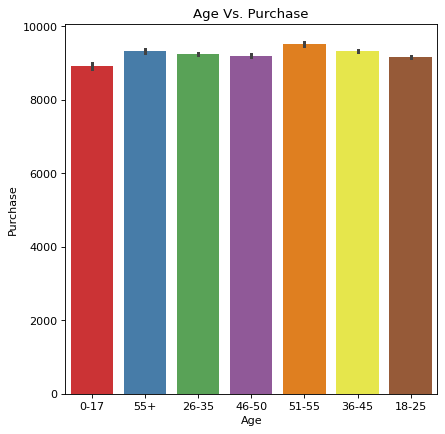

In [28]:
plt.figure(figsize= (6, 6), dpi= 80)
plt.title('Age Vs. Purchase')
sns.barplot(x= 'Age', y= 'Purchase', data= df, palette= 'Set1')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


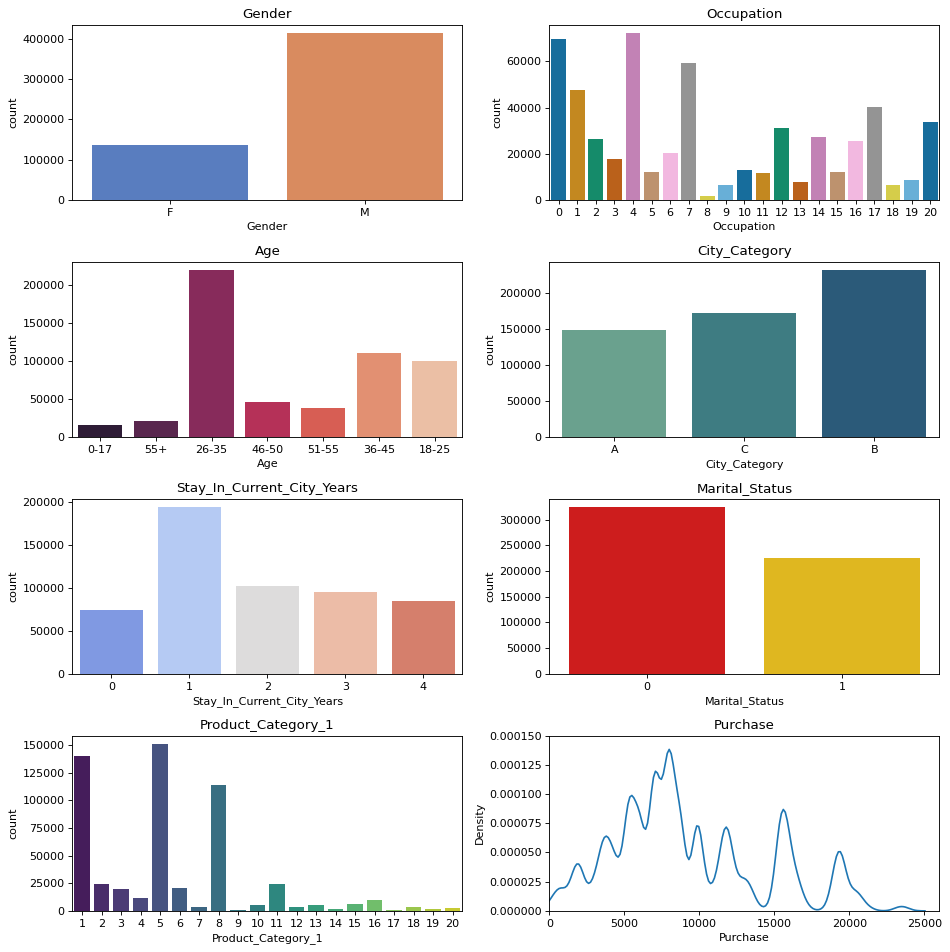

In [29]:
plt.figure(figsize= (12, 12), dpi= 80)
plt.subplot(4, 2, 1)
plt.title('Gender')
sns.countplot(x= 'Gender', data= df, palette= 'muted')

plt.subplot(4, 2, 3)
plt.title('Age')
sns.countplot(x= 'Age', data= df, palette= 'rocket')
 
plt.subplot(4, 2, 2)
plt.title('Occupation')
sns.countplot(x= 'Occupation', data= df, palette= 'colorblind')

plt.subplot(4, 2, 4)
plt.title('City_Category')
sns.countplot(x= 'City_Category', data= df, palette= 'crest')

plt.subplot(4, 2, 5)
plt.title('Stay_In_Current_City_Years')
sns.countplot(x= 'Stay_In_Current_City_Years', data= df, palette= 'coolwarm')

plt.subplot(4, 2, 6)
plt.title('Marital_Status')
sns.countplot(x= 'Marital_Status', data= df, palette= 'hot')

ax = plt.subplot(4, 2, 8)
plt.title('Purchase')
ax.set_xlim(0, 26000)
ax.set_ylim(0, 0.00015)
sns.kdeplot(df['Purchase'])

plt.subplot(4, 2, 7)
plt.title('Product_Category_1')
sns.countplot(x= 'Product_Category_1', data= df, palette= 'viridis')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

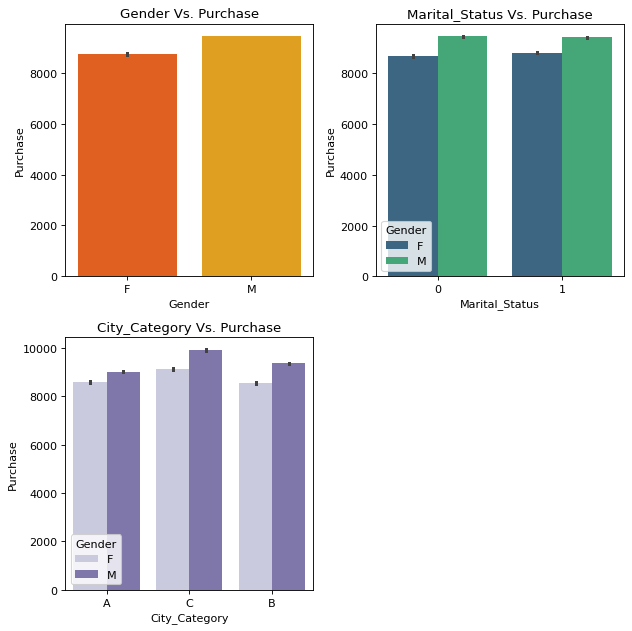

In [30]:
plt.figure(figsize= (8, 8), dpi= 80)
plt.subplot(2, 2, 1)
plt.title('Gender Vs. Purchase')
sns.barplot(x= 'Gender', y= 'Purchase', data= df, palette= 'autumn')

plt.subplot(2, 2, 2)
plt.title('Marital_Status Vs. Purchase')
sns.barplot(x= 'Marital_Status', y= 'Purchase', hue= 'Gender', data= df, palette= 'viridis')

plt.subplot(2, 2, 3)
plt.title('City_Category Vs. Purchase')
sns.barplot(x= 'City_Category', y= 'Purchase', data= df, hue= 'Gender', palette= 'Purples')

plt.tight_layout()
plt.show

<Axes: title={'center': 'Marital_Status Vs. Purchase'}, xlabel='Marital_Status', ylabel='Purchase'>

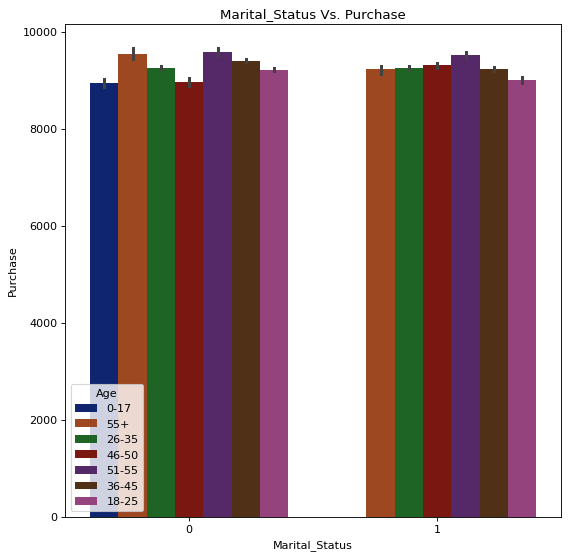

In [31]:
plt.figure(figsize= (8, 8), dpi= 80)
plt.title('Marital_Status Vs. Purchase')
sns.barplot(x= 'Marital_Status', y= 'Purchase', hue= 'Age', data= df, palette= 'dark')

,City_Category
City_Category,
A,147720
B,231173
C,171175


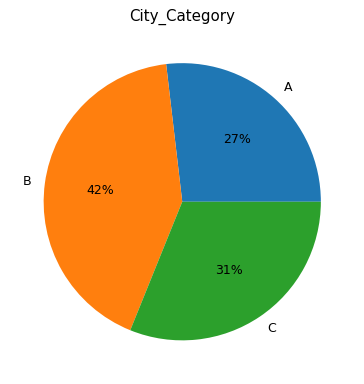

In [32]:
plt.figure(figsize= (5, 5), dpi= 90)
plt.title('City_Category')
palette_color= sns.color_palette('bright')
b = df.groupby('City_Category')['City_Category'].agg('count')

display(b.to_frame())
plt.pie(b, labels= b.index, autopct= '%.0f%%')

plt.show()

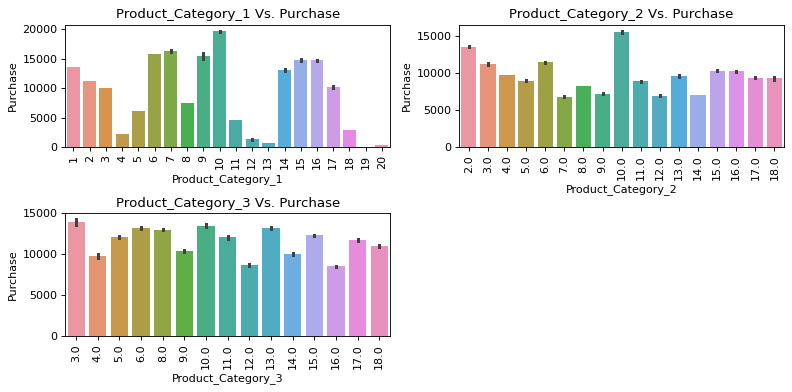

In [33]:
plt.figure(figsize= (10, 5), dpi= 80)
plt.subplot(2, 2, 1)
plt.title('Product_Category_1 Vs. Purchase')
sns.barplot(x= 'Product_Category_1', y= 'Purchase', data= df)
plt.xticks(rotation= 90)

plt.subplot(2, 2, 2)
plt.title('Product_Category_2 Vs. Purchase')
sns.barplot(x= 'Product_Category_2', y= 'Purchase', data= df)
plt.xticks(rotation= 90)

plt.subplot(2, 2, 3)
plt.title('Product_Category_3 Vs. Purchase')
sns.barplot(x= 'Product_Category_3', y= 'Purchase', data= df)
plt.xticks(rotation= 90)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


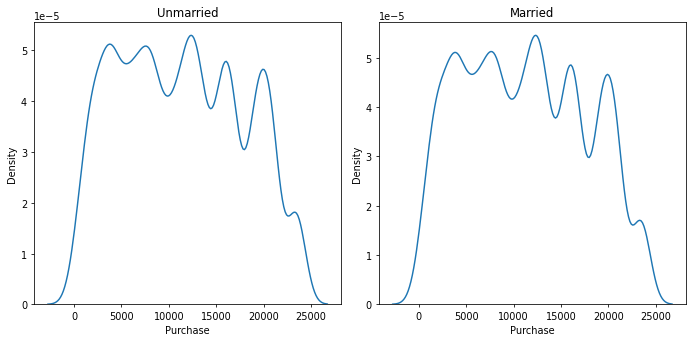

In [34]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
um=df[df['Marital_Status']==0].value_counts('Purchase')
plt.title('Unmarried')
sns.kdeplot(x= 'Purchase',data= um)

plt.subplot(1,2,2)
m=df[df['Marital_Status']==1].value_counts('Purchase')
plt.title('Married')
sns.kdeplot(x= 'Purchase',data= m)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


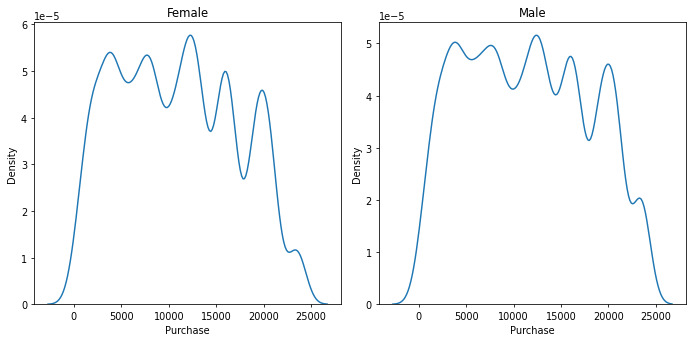

In [35]:
plt.figure(figsize=(10,5),dpi=70)
plt.subplot(1,2,1)
f=df[df['Gender']=='F'].value_counts('Purchase')
plt.title('Female')
sns.kdeplot(x= 'Purchase',data=f)

plt.subplot(1,2,2)
ma=df[df['Gender']=='M'].value_counts('Purchase')
plt.title('Male')
sns.kdeplot(x= 'Purchase',data=ma)

plt.tight_layout()
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 42.0+ MB


In [37]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['Gender'] = lr.fit_transform(df['Gender'])
df['Age'] = lr.fit_transform(df['Age'])
df['City_Category'] = lr.fit_transform(df['City_Category'])

df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,4.0,16.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,4.0,16.0,1422
3,0,0,10,0,2,0,12,14.0,16.0,1057
4,1,6,16,2,4,0,8,8.0,16.0,7969


In [38]:
x = df.drop('Purchase', axis=1)
y = df['Purchase']

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print('MSE of Linear Regression Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of Linear Regression Model is  3578.6095790882023


0.12899183854001894

In [41]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

print('MSE of Lasso Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of Lasso Model is  3578.5534139588103


0.1289900991722437

In [42]:
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print('MSE of Ridge Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of Ridge Model is  3578.6095228832573


0.12899183579392237

In [43]:
enet.fit(x_train, y_train)
y_pred = enet.predict(x_test)

print('MSE of ElasticNet Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of ElasticNet Model is  3585.695847943828


0.12714943365235998

In [44]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('MSE of Decision Tree Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of Decision Tree Model is  2358.4081295481596


0.5593523371672434

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('MSE of Random Forest Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of Random Forest Model is  2224.1203907486847


0.6296084153777649

In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('MSE of KNN Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of KNN Model is  2360.922789220766


0.5866043027085405

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state= 42)

gbr.fit(x_train, y_train)

ypred = gbr.predict(x_test)

print('MSE of Gradient Boosting Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of Gradient Boosting Model is  2360.922789220766


0.5866043027085405

In [48]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(learning_rate= 1.0, max_depth= 6, min_child_weight= 40, seed= 42, tree_method='hist')

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('MSE of XGBoost Model is ', mean_absolute_error(y_test, y_pred))
r2_score(y_test, y_pred)

MSE of XGBoost Model is  2160.874440550259


0.6667150190827729

The best Model is XGBoost